## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

In [2]:
#To display all columns in Jupyter Notebooks
pd.set_option('display.max_columns', 500)

## Retrieve data from Database

In [3]:
#Import MongoClient
from pymongo import MongoClient

#Create a MongoClient to run the MongoDB instance
client = MongoClient('localhost', 27017)

In [4]:
#Connect to existing datbase
db = client.NHANES_Q2

In [5]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'NHANES_Q2')

In [6]:
#Look at existing collections
col = db.list_collection_names()
col.sort()
col

['CA', 'CA_no_ohe', 'CL', 'CL_no_ohe', 'DI', 'DI_no_ohe', 'HD', 'HD_no_ohe']

In [7]:
#Collections
cl = db.CL
cl_no = db.CL_no_ohe

In [8]:
#Create dataframes from database collections
df_cl = pd.DataFrame(list(cl.find()))
df_cl_no = pd.DataFrame(list(cl_no.find()))

In [9]:
#Variable Declarations
df = df_cl.copy()
df_no = df_cl_no.copy()
label = 'MCQ160K'
labeldescr = 'Bronchitis (0-No, 1-Yes)'

## Reorder columns

### Reorder OHE dataframe

In [10]:
#Get a list of columns
cols = list(df)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df.columns)-1, cols.pop(cols.index(label)))

In [11]:
#Reorder dataframe
df = df.loc[:, cols]
df.head()

,_id,ALQ101_2_0,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,MCQ010_2_0,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR,MCQ160K
0,2.0,0,24.90,174.0,98.0,75.4,1,58.0,0,106.0,0,0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,0,2.0,1,0,0,0,3.0,0,8.0,1,1,1,1,0,77.0,0,1,0,0,1,1,0,3408.044382,3315.985398,0
1,5.0,0,29.10,178.3,99.9,92.5,0,82.0,0,122.0,0,0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,0,2.0,0,1,0,0,3.0,1,11.0,1,1,0,0,0,49.0,0,1,0,0,1,0,0,10219.103963,13105.246918,0
2,12.0,0,30.62,180.0,112.8,99.2,0,108.0,0,182.0,0,0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,0,4.0,0,1,0,0,2.0,1,11.0,1,1,1,0,0,37.0,0,1,0,0,1,1,0,10149.365568,13280.150390,1
3,15.0,0,26.68,174.9,86.7,81.6,1,68.0,0,106.0,0,0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,0,3.0,0,1,0,0,3.0,1,8.0,1,0,0,0,1,38.0,0,1,0,0,0,0,0,11437.714415,18684.987158,0
4,16.0,1,19.96,144.2,74.4,41.5,1,62.0,0,164.0,0,0,1.0,1.0,2.360000e+02,2129.94,5.397605e-79,5.397605e-79,509.35,112.24,124.95,0.66,16.36,7.54,898.38,183.60,689.38,1458.25,39.62,33.87,1844.08,0.88,1.19,0.89,0.77,69.19,6.47,0,3.0,0,1,0,0,1.0,1,1.0,1,1,0,1,1,85.0,0,0,1,0,1,1,0,1957.498400,1304.207395,0


### Reorder non-OHE dataframe

In [12]:
#Get a list of columns
cols = list(df_no)

#Move '_id' column to head of list using dex, pop and insert
cols.insert(0, cols.pop(cols.index('_id')))

#Move 'Year' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('Year')))

#Move 'MEC18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('MEC18YR')))

#Move 'DRX18YR' column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index('DRX18YR')))

#Move label column to back of list using index, pop and insert
cols.insert(len(df_no.columns)-1, cols.pop(cols.index(label)))

In [13]:
#Reorder dataframe
df_no = df_no.loc[:, cols]
df_no.head()

,_id,ALQ101,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020,BPXDI1,BPXPULS,BPXSY1,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,MCQ010,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDAGEYR,RIDRETH1,SMAQUEX,SMD410,SMQ680,Year,MEC18YR,DRX18YR,MCQ160K
0,2.0,1.0,24.90,174.0,98.0,75.4,2.0,58.0,1.0,106.0,1.0,1.0,1.0,5.0,5.397605e-79,5710.03,5.397605e-79,5.304500e+02,925.37,350.37,313.95,2.08,36.99,37.29,2463.00,502.25,1974.57,4672.48,123.16,71.95,923.91,2.11,8.68,3.25,2.90,119.12,41.61,1.0,2.0,2.0,1.0,3.0,1.0,8.0,2.0,2.0,2.0,2.0,1.0,77.0,3.0,2.0,2.0,2.0,0,3408.044382,3315.985398,0
1,5.0,1.0,29.10,178.3,99.9,92.5,1.0,82.0,1.0,122.0,1.0,1.0,3.0,4.0,1.298000e+03,3756.36,3.456000e+01,5.397605e-79,1626.38,253.98,180.57,1.95,17.28,27.22,2658.14,367.72,1811.55,3743.15,97.13,114.52,1298.44,2.62,6.66,3.05,2.92,112.19,10.17,1.0,2.0,3.0,1.0,3.0,2.0,11.0,2.0,2.0,1.0,1.0,1.0,49.0,3.0,2.0,2.0,1.0,0,10219.103963,13105.246918,0
2,12.0,1.0,30.62,180.0,112.8,99.2,1.0,108.0,1.0,182.0,1.0,1.0,4.0,2.0,3.304000e+03,7511.18,5.397605e-79,3.090200e+02,1292.81,309.57,1242.06,1.70,18.68,23.31,3348.31,435.55,2364.22,4607.26,130.02,178.85,923.80,2.43,8.36,3.31,2.40,70.96,17.47,1.0,4.0,3.0,1.0,2.0,2.0,11.0,2.0,2.0,2.0,1.0,1.0,37.0,3.0,2.0,2.0,2.0,0,10149.365568,13280.150390,1
3,15.0,1.0,26.68,174.9,86.7,81.6,2.0,68.0,1.0,106.0,1.0,1.0,2.0,5.0,2.478000e+03,3832.49,1.315000e+01,4.328500e+02,814.59,264.69,596.30,1.40,16.15,16.14,2573.14,266.80,1321.30,3171.15,82.66,127.03,720.50,1.38,4.64,1.79,1.72,36.11,11.77,1.0,3.0,3.0,1.0,3.0,2.0,8.0,2.0,1.0,1.0,1.0,2.0,38.0,3.0,2.0,1.0,1.0,0,11437.714415,18684.987158,0
4,16.0,2.0,19.96,144.2,74.4,41.5,2.0,62.0,1.0,164.0,1.0,1.0,1.0,1.0,2.360000e+02,2129.94,5.397605e-79,5.397605e-79,509.35,112.24,124.95,0.66,16.36,7.54,898.38,183.60,689.38,1458.25,39.62,33.87,1844.08,0.88,1.19,0.89,0.77,69.19,6.47,1.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,85.0,4.0,2.0,2.0,2.0,0,1957.498400,1304.207395,0


# Exploratory Data Analysis

### Analysis of Data

In [14]:
import seaborn as sns

In [15]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33009 entries, 0 to 33008
Data columns (total 58 columns):
_id         33009 non-null float64
ALQ101      33009 non-null float64
BMXBMI      33009 non-null float64
BMXHT       33009 non-null float64
BMXWAIST    33009 non-null float64
BMXWT       33009 non-null float64
BPQ020      33009 non-null float64
BPXDI1      33009 non-null float64
BPXPULS     33009 non-null float64
BPXSY1      33009 non-null float64
DMDBORN4    33009 non-null float64
DMDCITZN    33009 non-null float64
DMDHHSIZ    33009 non-null float64
DMDHREDU    33009 non-null float64
DRD320GW    33009 non-null float64
DRDTSODI    33009 non-null float64
DRXTALCO    33009 non-null float64
DRXTCAFF    33009 non-null float64
DRXTCALC    33009 non-null float64
DRXTCARB    33009 non-null float64
DRXTCHOL    33009 non-null float64
DRXTCOPP    33009 non-null float64
DRXTFIBE    33009 non-null float64
DRXTIRON    33009 non-null float64
DRXTKCAL    33009 non-null float64
DRXTMAGN    3300

### Define Categorical & Numerical Features

In [16]:
#Change columns to category
#Columns to remove: 
#DRX18YR - 18 Year weight
#MEC18YR - 18 year Weight
#Year - Year of observation
#_id - Unique ID to identify individual

cat_cols = ['DMDBORN4',
            'DMDCITZN',
            'DMDHHSIZ',
            'DMDHREDU',
            'INDFMINC',
            'RIAGENDR',
            'RIDRETH1',
            'ALQ101',
            'DIQ010',
            'BPQ020',
            'BPXPULS',
            'PAQ635',
            'PAQ650',
            'PAQ665',
            'SMAQUEX',
            'SMQ680',
            'SMD410',
            'MCQ010',
            'MCQ160C',
            'MCQ220',
            'MCQ160K',
            'HID010',
            'HUQ010',
            'HUQ020',
            'HUQ030',
            'HUQ050',
            'HUQ070',
            'WHQ030',
            'WHQ040']

num_cols = ['RIDAGEYR',
            'DRD320GW',
             'DRDTSODI',
             'DRX18YR',
             'DRXTALCO',
             'DRXTCAFF',
             'DRXTCALC',
             'DRXTCARB',
             'DRXTCHOL',
             'DRXTCOPP',
             'DRXTFIBE',
             'DRXTIRON',
             'DRXTKCAL',
             'DRXTMAGN',
             'DRXTMFAT',
             'DRXTPFAT',
             'DRXTPHOS',
             'DRXTPOTA',
             'DRXTPROT',
             'DRXTSFAT',
             'DRXTTFAT',
             'DRXTVARE',
             'DRXTVB1',
             'DRXTVB12',
             'DRXTVB2',
             'DRXTVB6',
             'DRXTVC',
             'DRXTZINC',   
             'BPXDI1',
             'BPXSY1',
             'LBDHDL',
             'LBDHDLSI',
             'LBDLDL',
             'LBDLDLSI',
             'LBDTCSI',
             'LBDTRSI',
             'LBXTC',
             'LBXTR',
             'BMXBMI',
             'BMXHT',
             'BMXWAIST',
             'BMXWT'
]


def recat_cols(df, col_names):
    for x in col_names:
        if x in cat_cols:
            df[x] = df[x].astype('category')
    return df

col_names = df_no.columns
df_no = recat_cols(df_no, col_names)

In [17]:
#Recategorized columns
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33009 entries, 0 to 33008
Data columns (total 58 columns):
_id         33009 non-null float64
ALQ101      33009 non-null category
BMXBMI      33009 non-null float64
BMXHT       33009 non-null float64
BMXWAIST    33009 non-null float64
BMXWT       33009 non-null float64
BPQ020      33009 non-null category
BPXDI1      33009 non-null float64
BPXPULS     33009 non-null category
BPXSY1      33009 non-null float64
DMDBORN4    33009 non-null category
DMDCITZN    33009 non-null category
DMDHHSIZ    33009 non-null category
DMDHREDU    33009 non-null category
DRD320GW    33009 non-null float64
DRDTSODI    33009 non-null float64
DRXTALCO    33009 non-null float64
DRXTCAFF    33009 non-null float64
DRXTCALC    33009 non-null float64
DRXTCARB    33009 non-null float64
DRXTCHOL    33009 non-null float64
DRXTCOPP    33009 non-null float64
DRXTFIBE    33009 non-null float64
DRXTIRON    33009 non-null float64
DRXTKCAL    33009 non-null float64
DRXTMAGN 

## Plots of Features

### Categorical Features

In [18]:
#Get Categorical Features Only
df_cat = df_no.copy()
df_cat = df_cat.select_dtypes(include=['category'])
df_cat = df_cat.drop([label], axis=1)

In [19]:
df_cat.head()

,ALQ101,BPQ020,BPXPULS,DMDBORN4,DMDCITZN,DMDHHSIZ,DMDHREDU,HID010,HUQ010,HUQ020,HUQ030,HUQ050,HUQ070,INDFMINC,MCQ010,PAQ635,PAQ650,PAQ665,RIAGENDR,RIDRETH1,SMAQUEX,SMD410,SMQ680
0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,8.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,2.0,3.0,1.0,3.0,2.0,11.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0
2,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,11.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0
3,1.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,3.0,1.0,3.0,2.0,8.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0


In [20]:
df_cat.shape

(33009, 23)

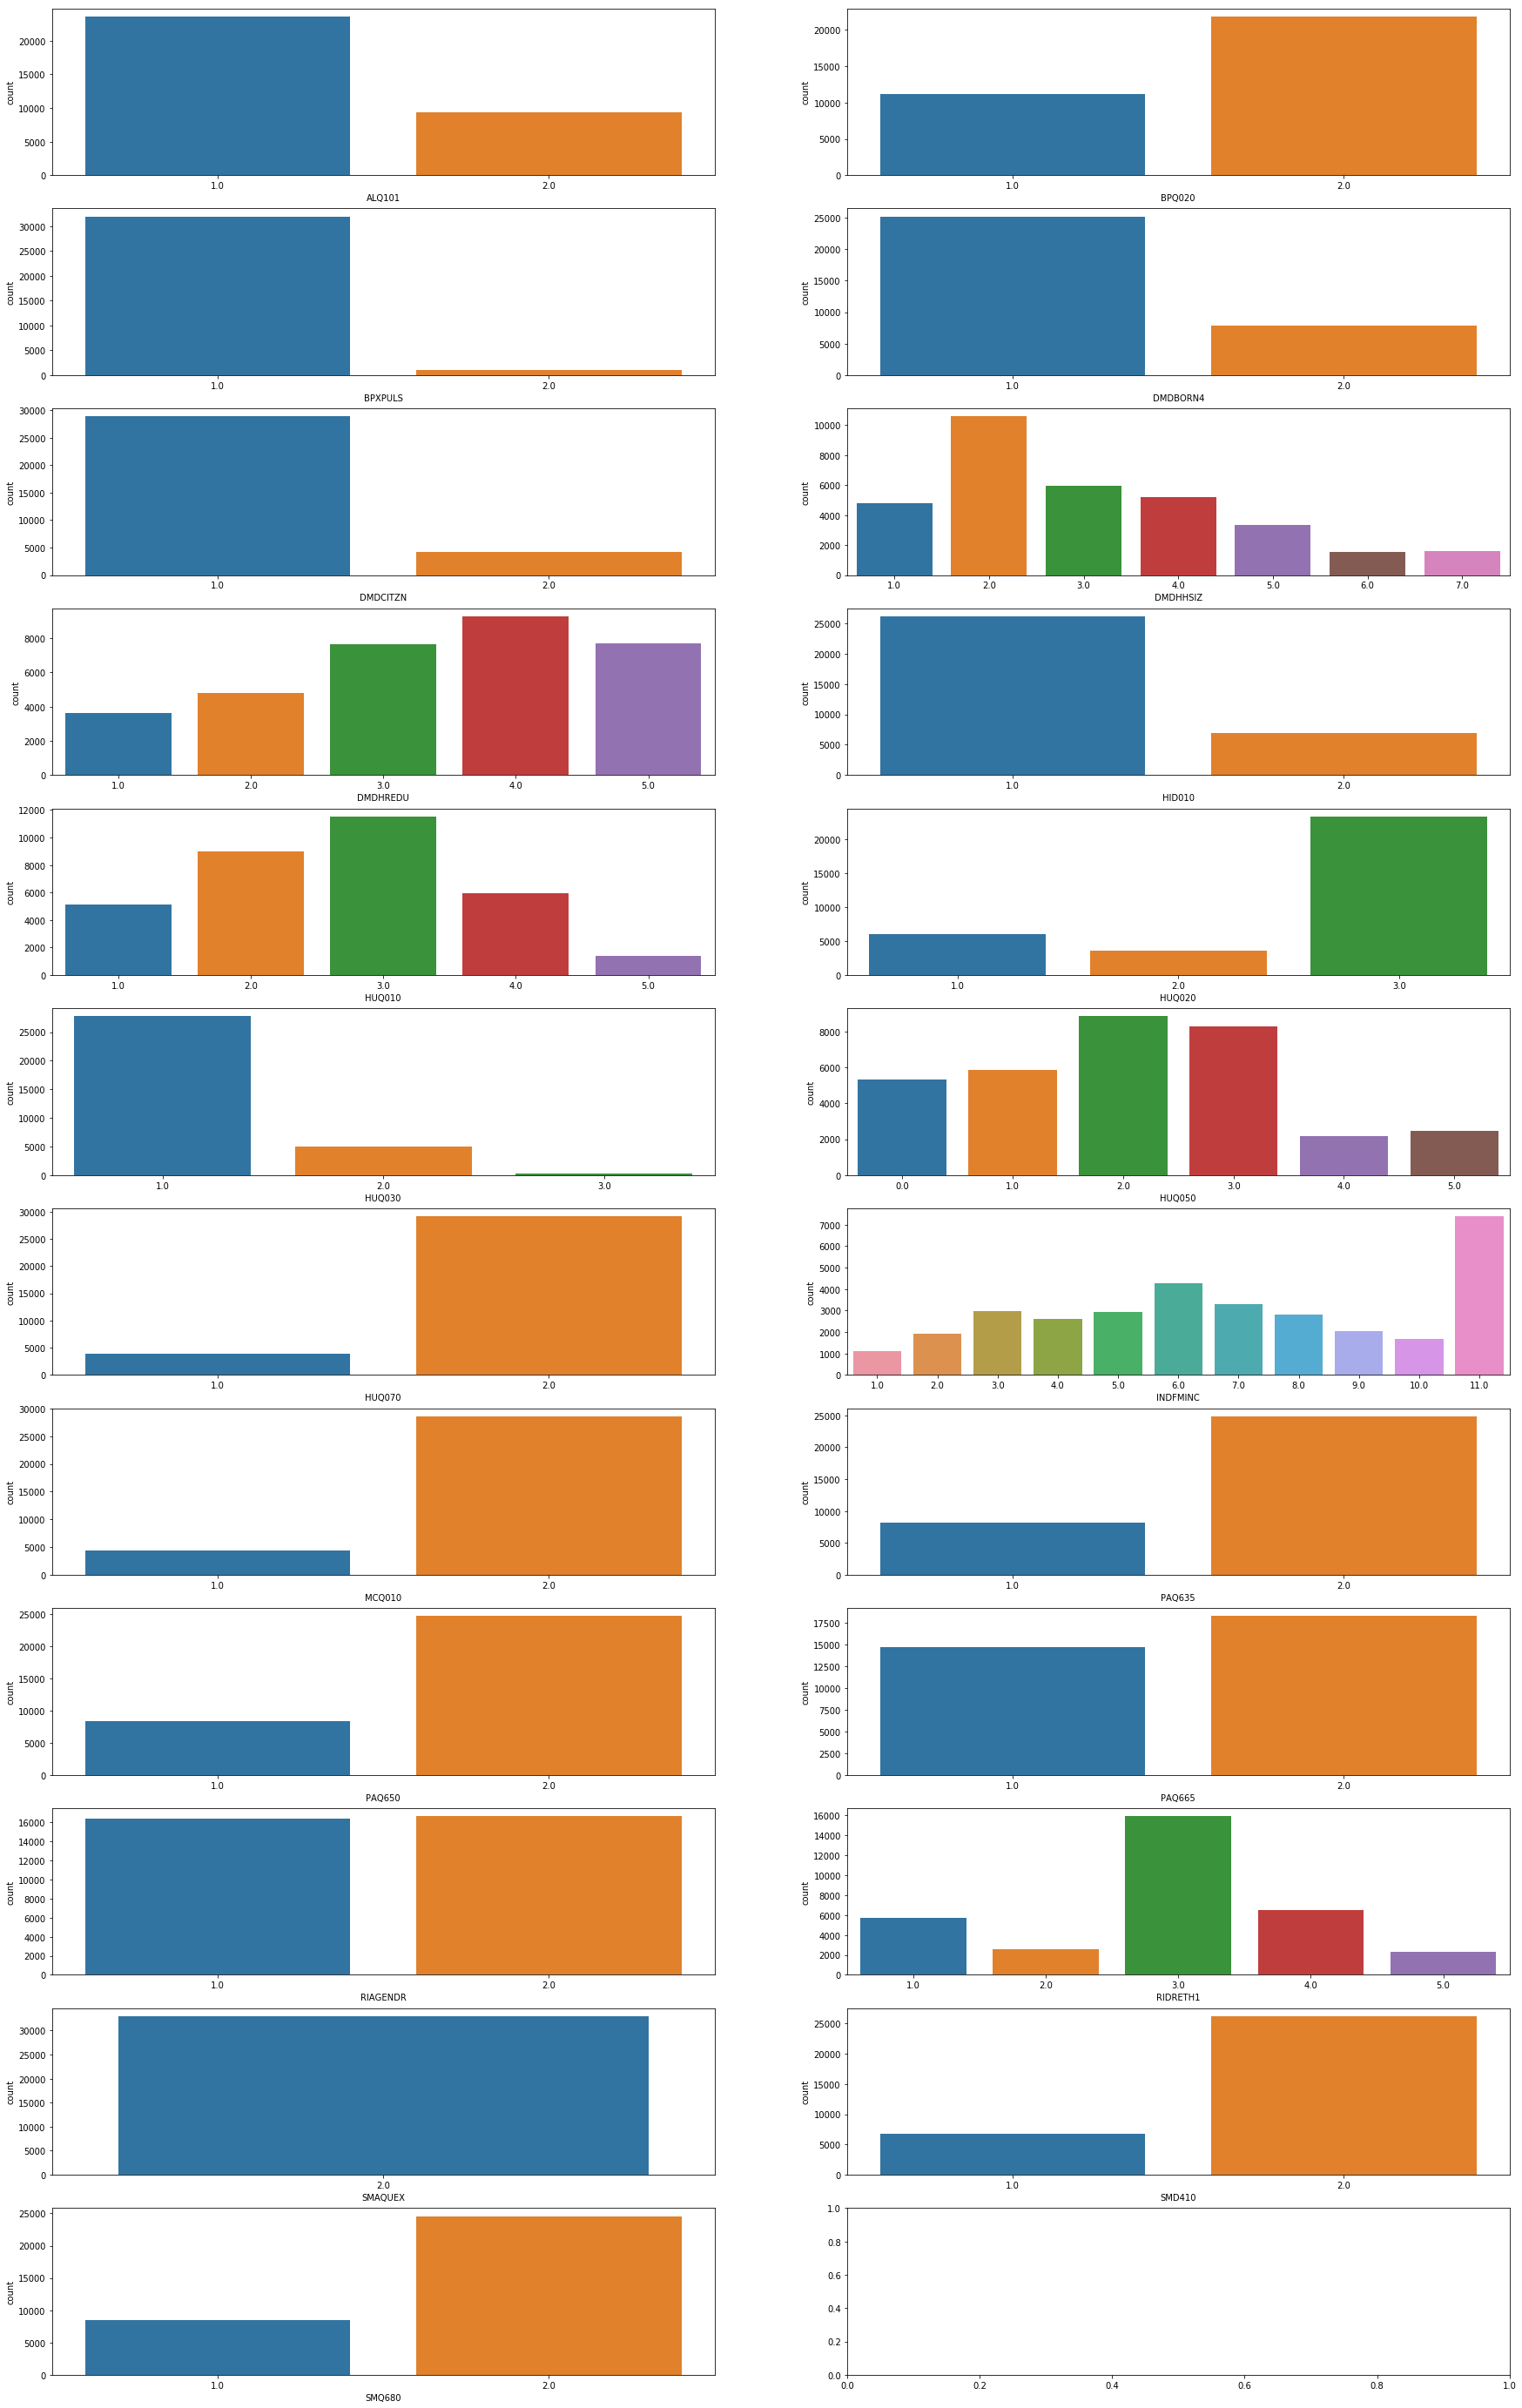

In [21]:
fig, ax = plt.subplots(12, 2, figsize=(30,50))
ax = ax.flatten()
for a, catplot in zip(ax, list(df_cat.columns)):
    sns.countplot(x=catplot, data=df_cat, ax=a)
plt.show()

### Numerical Features

In [22]:
#Get Numerical Features Only
df_num = df_no.copy()
df_num = df_num.select_dtypes(include=['float64'])
df_num = df_num.drop(['_id','MEC18YR','DRX18YR'], axis=1)

In [23]:
df_num.shape

(33009, 30)

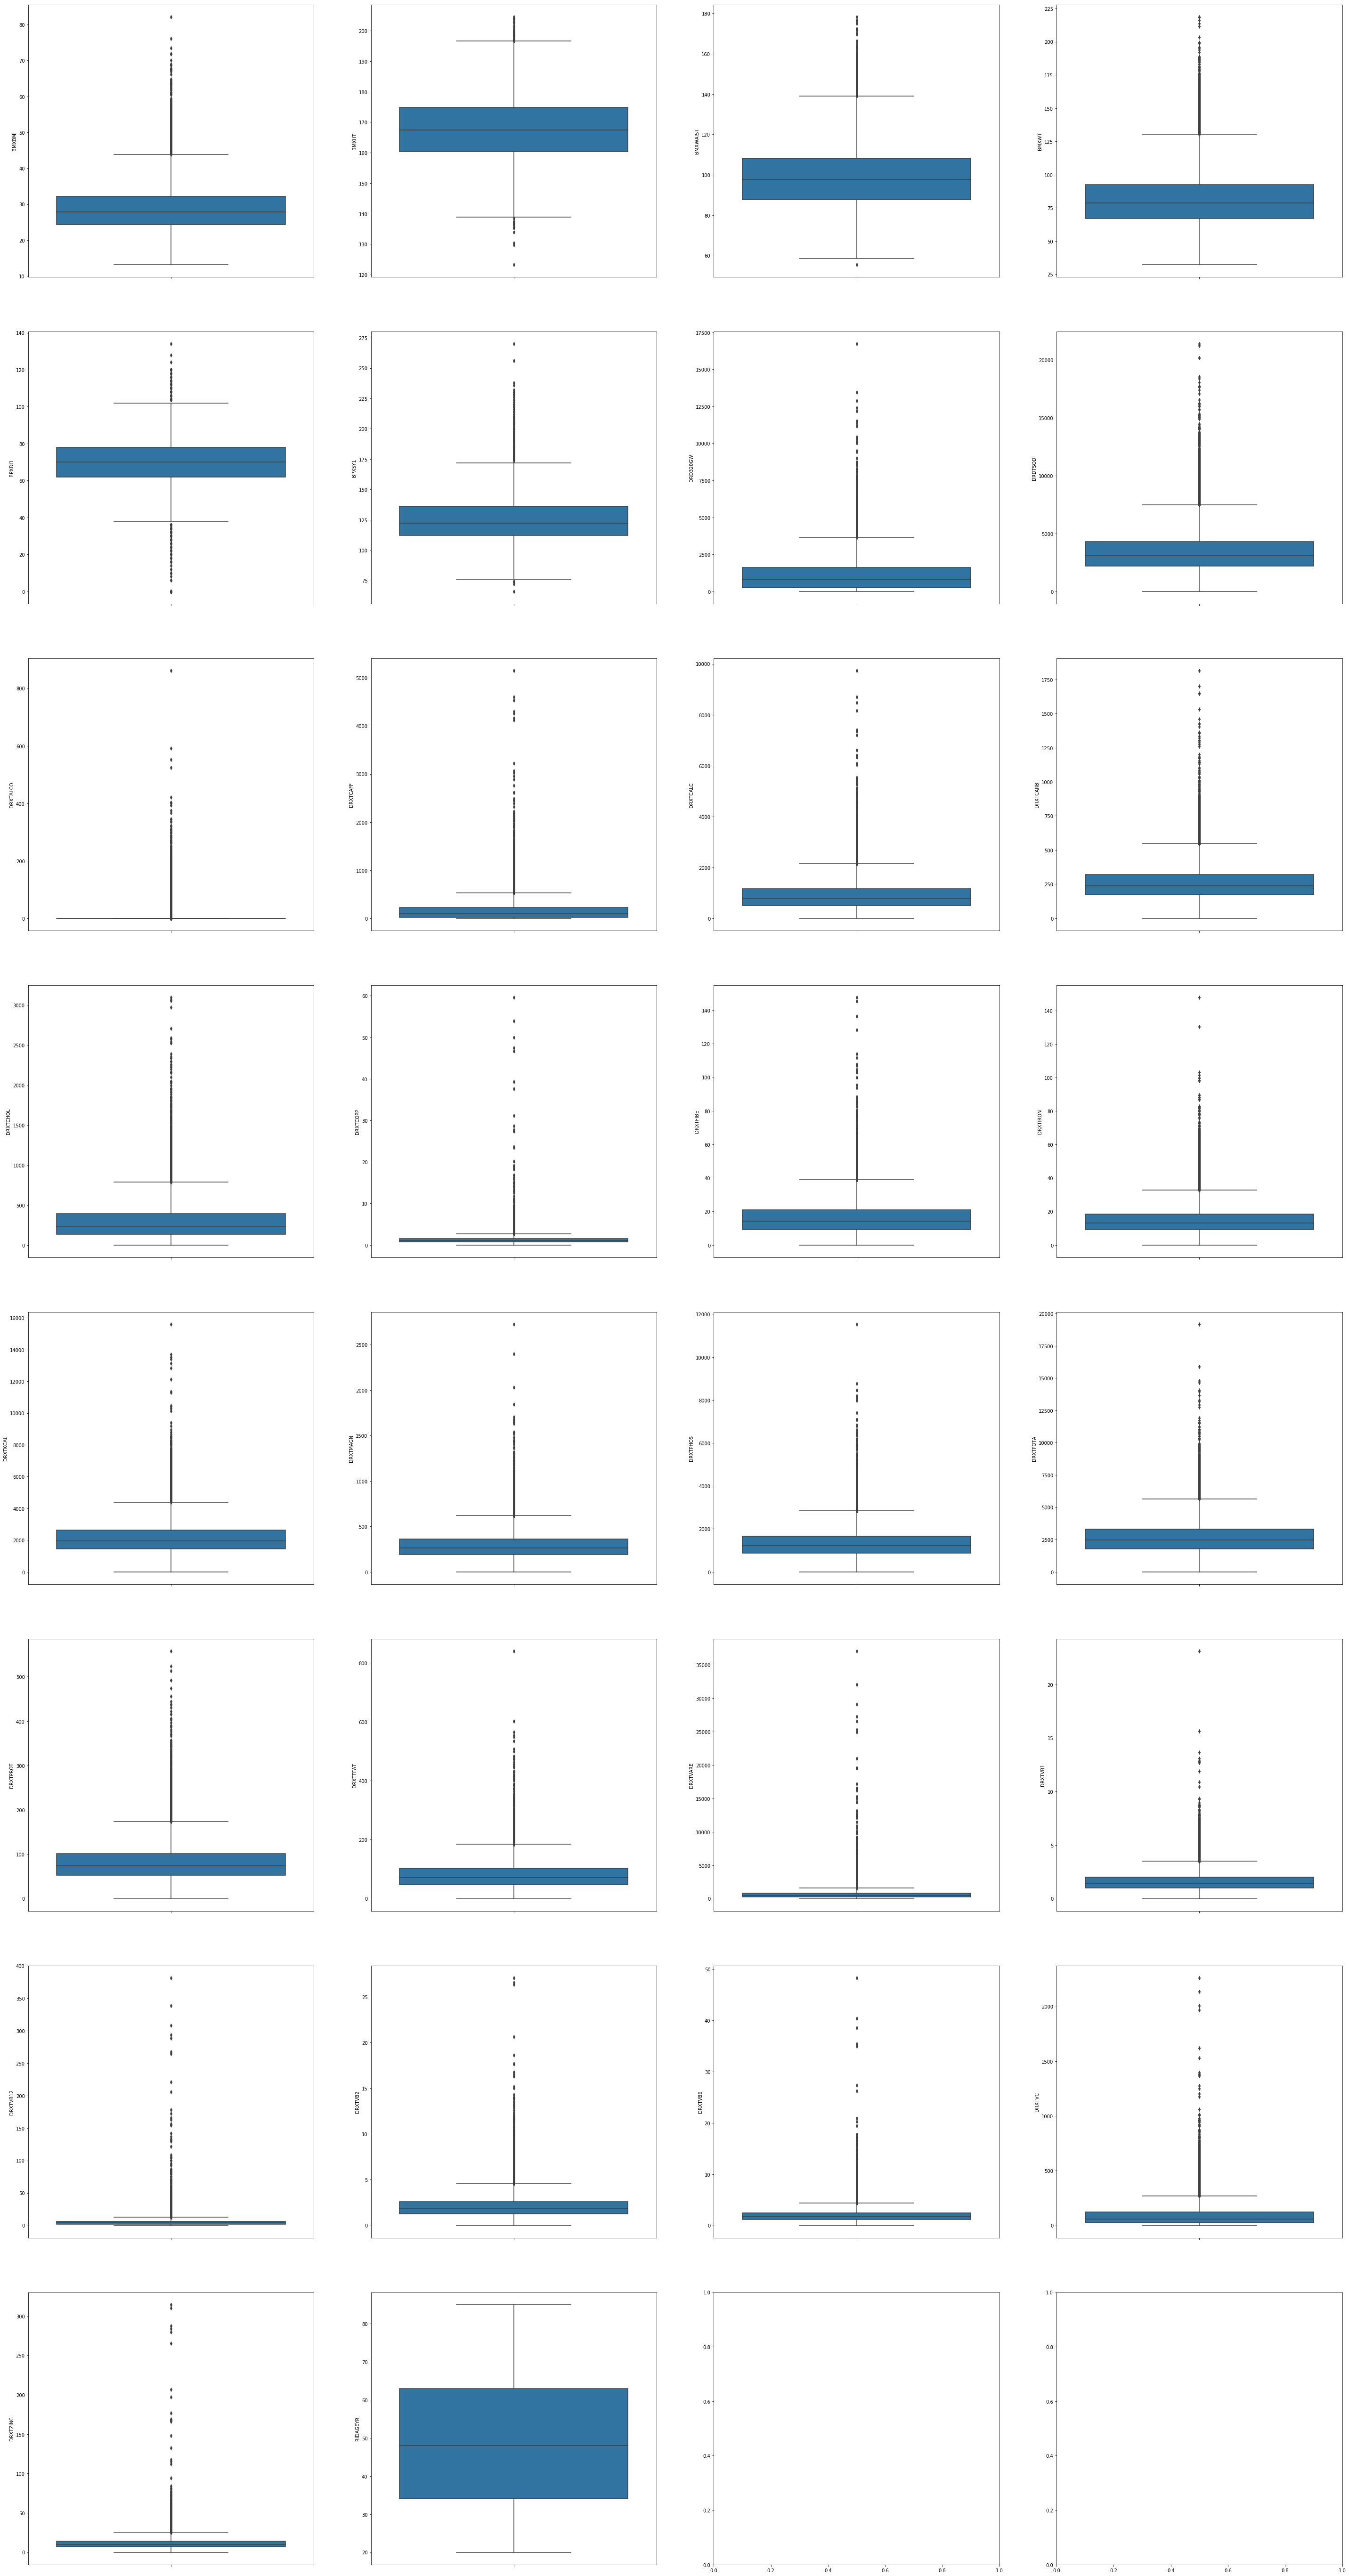

In [24]:
fig, ax = plt.subplots(8, 4, figsize=(50,100))
ax = ax.flatten()
for a, bp in zip(ax, list(df_num.columns)):
    sns.boxplot(y=bp, data=df_num, ax=a)
plt.show()

### Class Distribution

In [25]:
label_count = df_no.groupby(label, as_index = False).count()

In [26]:
#Count of class labels
class_names = list(label_count[label]) #Count the different labels
count = list(label_count['_id']) #Sum of different labels
count

[31070, 1939]

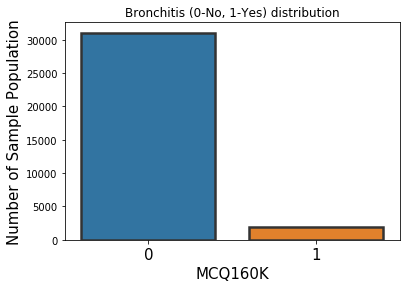

In [27]:
#Bar Plot of Class Labels
index = np.arange(len(class_names))
sns.barplot(x=class_names, y=count, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel(label, fontsize=15)
plt.ylabel('Number of Sample Population', fontsize=15)
plt.xticks(index, class_names, fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

In [28]:
#Find balance of labels
sum(df_no[label]==1)/(len(df_no[label]))
#0.9413 in majority class - No Bronchitis
#0.0587 in minority class - Bronchitis

0.058741555333393924

## Class distribution as percentage of years

In [29]:
label_perc = df_no.groupby(['Year',label], as_index = False).count()

In [30]:
lp = label_perc[['Year', '_id',label]].copy()

In [31]:
perc = lp.groupby(['Year', '_id']).agg({'_id': 'sum'})
perc = perc.rename(columns={ perc.columns[0]: "pcts" })
perc = perc.sort_values(by=['Year','pcts'], ascending=[True, False])
# Change: groupby Year and divide by sum
label_pcts = perc.groupby(level=0).apply(lambda x: x / float(x.sum()))

In [32]:
#Get percentage values
lp['Percentages'] = label_pcts.values

In [33]:
lp.head()

,Year,_id,MCQ160K,Percentages
0,0,2710,0,0.934483
1,0,190,1,0.065517
2,1,3335,0,0.943957
3,1,198,1,0.056043
4,2,2935,0,0.936503


In [34]:
year_names = list(lp['Year'])
class_names = list(lp[label])

In [35]:
perc = list(lp['Percentages'])

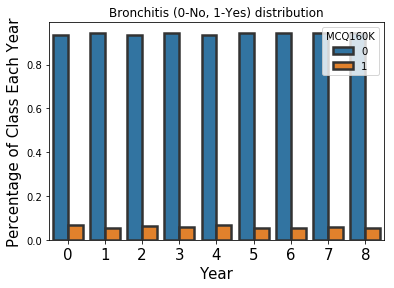

In [36]:
sns.barplot(x='Year', y='Percentages', data=lp, hue=label, linewidth=2.5, errcolor=".2", edgecolor=".2")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Percentage of Class Each Year', fontsize=15)
plt.xticks(fontsize=15)
plt.title(labeldescr+' distribution')
plt.show()

## Correlation of Numerical Features

### Pearson's Coefficient

#### Correlation of Numerical features

In [37]:
df_no.shape

(33009, 58)

In [38]:
#get Correlations of each features in dataset
x = ['_id', 'Year', 'MEC18YR', 'DRX18YR']

corrmat = df_no[df_no.columns.difference(x)].corr()
top_corr_features = corrmat.index

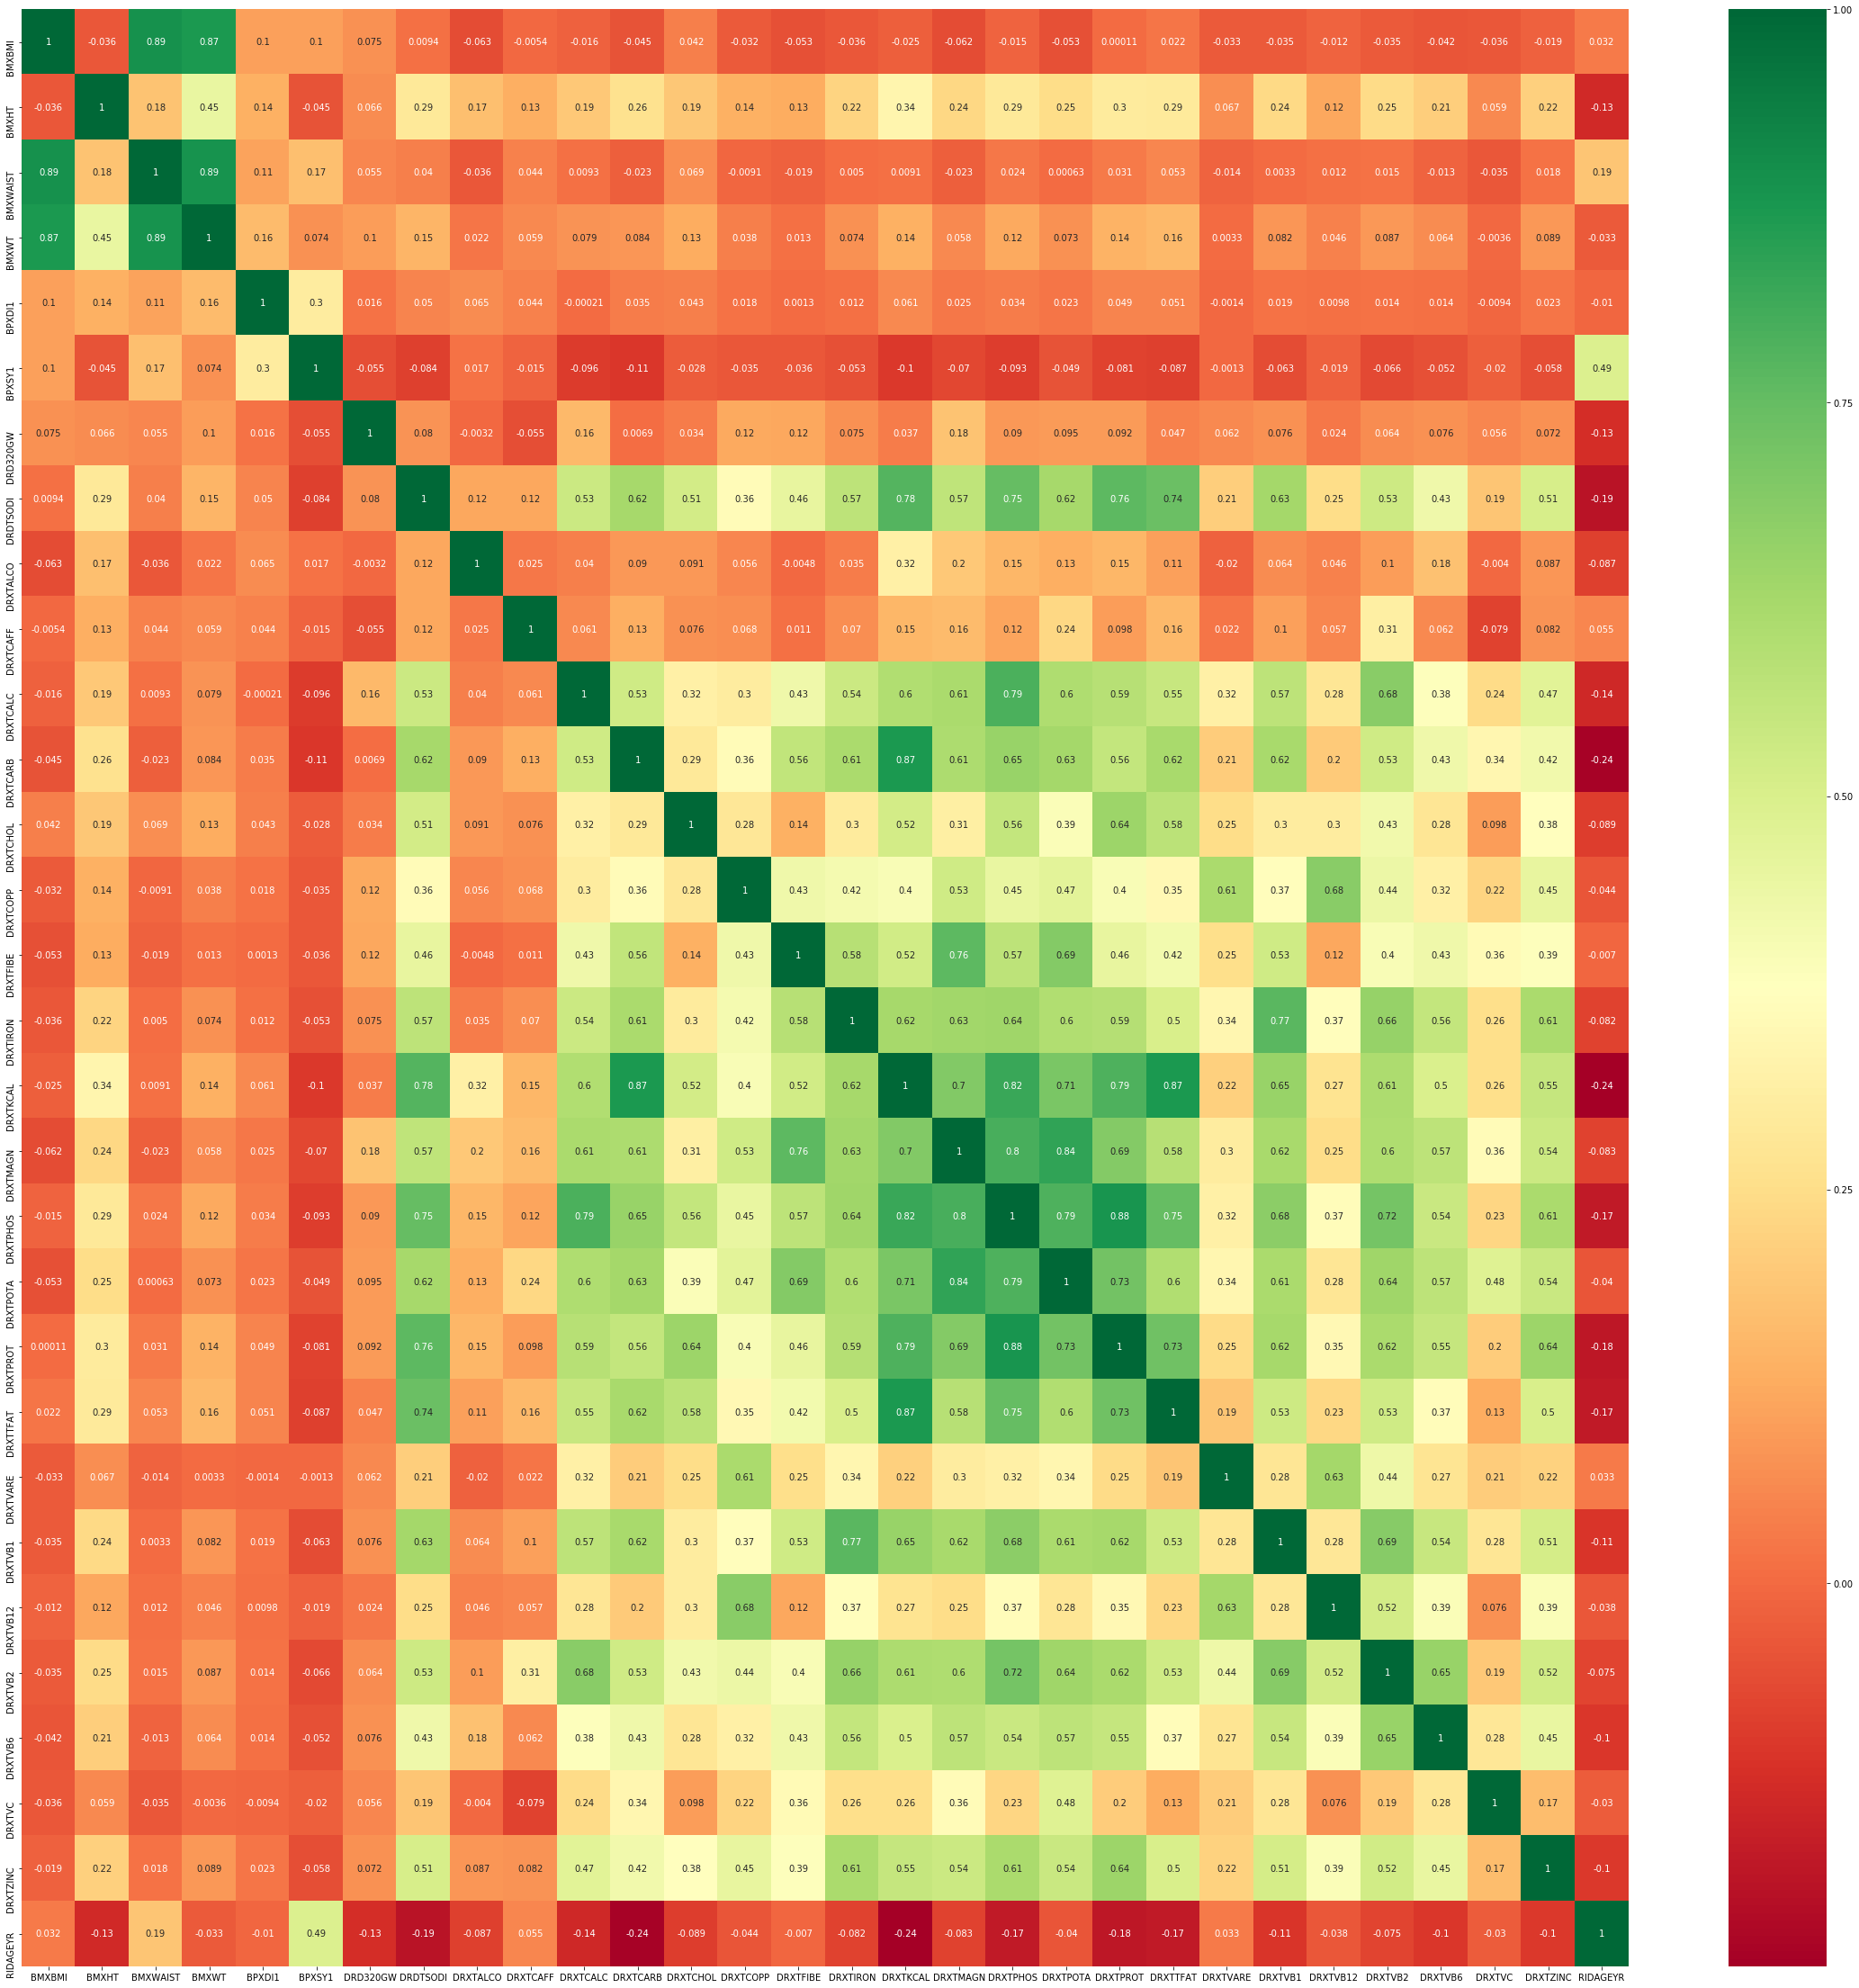

In [39]:
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
#cor_target = abs(corrmat[label])
#relevant_features = cor_target[cor_target>0.1]
#relevant_features

# Create X and y

In [41]:
#Drop variables
#Create X - drop id, label, and sample weight
X = df.drop(['_id', label], axis=1)

#Maintain id of X's
X_idx = df[['_id']]

#Create y - label
y = df[[label]]

#Create column to stratify based on year
year = df[['Year']]

In [42]:
X.shape

(33009, 60)

# Split Train, Test

In [43]:
#Train, test, split
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
#Stratify Train, Test based on Year Value
#80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=year)

In [45]:
#y_true is test label
y_true = y_test[label]

In [46]:
df['Year'].value_counts()

5    4334
4    4265
7    3901
8    3848
6    3613
1    3533
3    3481
2    3134
0    2900
Name: Year, dtype: int64

## Check if Stratified Sampling Worked

In [47]:
#See if years are split evenly in training and test
xt = X_train['Year'].value_counts()
xte = X_test['Year'].value_counts()

In [48]:
#Test is 20% of Training for each year
xte/(xte+xt)

5    0.200046
4    0.200000
7    0.199949
8    0.200104
6    0.200111
1    0.199830
3    0.199943
2    0.200064
0    0.200000
Name: Year, dtype: float64

In [49]:
#Test set label distribution
yt = y_true.value_counts()
yt

0    6237
1     365
Name: MCQ160K, dtype: int64

In [50]:
yt[0]/(yt[0]+yt[1])

0.9447137231142079

In [51]:
#Train set label distribution
ytr = y_train[label].value_counts()
ytr

0    24833
1     1574
Name: MCQ160K, dtype: int64

In [52]:
ytr[0]/(ytr[0]+ytr[1])

0.9403945923429393

# Resample: Upsample and Downsample (Not Used)

We have imbalanced data, so we want to do upsampling and downsampling to see if it will improve the model

In [53]:
from sklearn.utils import resample

In [54]:
#Resample training data function
def resample_train(X_train, y_train, sample_type, label):
    #Concatenate our training data back together
    X_r = pd.concat([X_train, y_train], axis=1)
    
    #Separate minority and majority classes
    minority = X_r[X_r[label]==1]
    majority = X_r[X_r[label]==0]
    
    if (sample_type=='up'):
        #Upsample minority class
        resampled = resample(minority,
                           replace=True, #Sample with replacement
                           n_samples=len(majority), #Match number in majority class
                           random_state=0) #Reproducible results
        notsampled=majority
    
    if (sample_type=='down'):
        #Downsample majority class
        resampled = resample(majority,
                           replace=False, #Sample without replacement
                           n_samples=len(minority), #Match minority n
                           random_state=0) #Reproducible results
        notsampled=minority
    
    #Combine upsample or downsample of majority and minority
    sampled = pd.concat([resampled, notsampled])
    y_train = sampled[[label]]
    X_train = sampled.drop([label], axis=1)
    return X_train, y_train    

#### Sklearn Upsampled

In [55]:
X_train_u, y_train_u = resample_train(X_train, y_train, 'up', label)

In [56]:
y_train_u[y_train_u[label]==1].shape

(24833, 1)

In [57]:
y_train_u[y_train_u[label]==0].shape

(24833, 1)

#### Sklearn Downsampled

In [58]:
X_train_d, y_train_d = resample_train(X_train, y_train, 'down', label)

In [59]:
y_train_d[y_train_d[label]==1].shape

(1574, 1)

In [60]:
y_train_d[y_train_d[label]==0].shape

(1574, 1)

# Imbalance Learn - SMOTE (Up) and TomekLinks (Down)

### Upsampling - SMOTE

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=1)

In [63]:
X_sm, y_sm = sm.fit_sample(X_train, y_train.values.ravel())

In [64]:
#Before upsampling - Majority
len(y_train[y_train[label]==0])

24833

In [65]:
#Before upsampling - Minority
len(y_train[y_train[label]==1])

1574

In [66]:
#After upsampling, majority and minority match
sum(y_sm==0)

24833

In [67]:
sum(y_sm==1)

24833

### Downsampling - Tomeklinks

In [68]:
from imblearn.under_sampling import TomekLinks

In [69]:
tLinks = TomekLinks(random_state = 0, return_indices = True)

In [70]:
X_tl, y_tl, id_tl = tLinks.fit_sample(X_train, y_train.values.ravel())

In [71]:
#Before downsampling - Majority
len(y_train[y_train[label]==0])

24833

In [72]:
#Before downsampling - Minority
len(y_train[y_train[label]==1])

1574

In [73]:
#After downsampling, majority decreases in neighbors
sum(y_tl==0)

24213

In [74]:
sum(y_tl==1)

1574

# Clean Columns for Training Data

## Regular Training and Test

In [75]:
X_cols = list(X_train.columns)

#Get MEC18YR from training & test data
Xtr_sw = X_train[['MEC18YR']]
Xts_sw = X_test[['MEC18YR']]

#Get DRX18YR from training & test data
Xtr_dsw = X_train[['DRX18YR']]
Xts_dsw = X_test[['DRX18YR']]

#Get Year from training & test data
Xtr_yr = X_train[['Year']]
Xts_yr = X_test[['Year']]

#Drop columns for training
X_train = X_train.drop(['MEC18YR','DRX18YR','Year'], axis=1)
X_test = X_test.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## SMOTE

In [76]:
X_sm = pd.DataFrame(X_sm, columns = X_cols)

In [77]:
X_sm.head()

,ALQ101_2_0,BMXBMI,BMXHT,BMXWAIST,BMXWT,BPQ020_2_0,BPXDI1,BPXPULS_2_0,BPXSY1,DMDBORN4_2_0,DMDCITZN_2_0,DMDHHSIZ,DMDHREDU,DRD320GW,DRDTSODI,DRXTALCO,DRXTCAFF,DRXTCALC,DRXTCARB,DRXTCHOL,DRXTCOPP,DRXTFIBE,DRXTIRON,DRXTKCAL,DRXTMAGN,DRXTPHOS,DRXTPOTA,DRXTPROT,DRXTTFAT,DRXTVARE,DRXTVB1,DRXTVB12,DRXTVB2,DRXTVB6,DRXTVC,DRXTZINC,HID010_2_0,HUQ010,HUQ020_2_0,HUQ020_3_0,HUQ030_2_0,HUQ030_3_0,HUQ050,HUQ070_2_0,INDFMINC,MCQ010_2_0,PAQ635_2_0,PAQ650_2_0,PAQ665_2_0,RIAGENDR_2_0,RIDAGEYR,RIDRETH1_2_0,RIDRETH1_3_0,RIDRETH1_4_0,RIDRETH1_5_0,SMD410_2_0,SMQ680_2_0,Year,MEC18YR,DRX18YR
0,1.0,36.90,156.0,110.7,89.9,0.0,6.400000e+01,0.0,122.0,0.0,0.0,2.0,2.0,1.140000e+03,4517.00,5.397605e-79,173.00,1488.00,231.43,258.00,0.774,9.30,25.02,1900.00,199.00,1423.00,1940.00,58.49,83.71,449.00,1.601,3.55,2.524,2.030,17.90,15.22,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,59.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,14475.219020,8251.827478
1,1.0,20.79,143.8,84.7,43.0,0.0,5.397605e-79,0.0,112.0,1.0,1.0,4.0,1.0,5.900000e+02,2131.14,5.397605e-79,68.33,742.03,128.15,309.61,0.900,12.73,10.76,1194.63,236.06,908.01,2412.99,47.47,57.65,637.38,0.810,3.28,1.500,1.920,56.14,7.86,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,76.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,447.343612,726.197383
2,0.0,22.27,183.5,89.8,75.0,0.0,6.600000e+01,0.0,128.0,0.0,0.0,2.0,5.0,5.397605e-79,5724.00,4.360000e+01,410.00,1277.00,324.71,546.00,3.352,23.40,36.99,3695.00,610.00,2757.00,5364.00,232.26,129.82,868.00,3.215,24.15,5.911,5.945,23.70,50.96,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,1.0,1.0,0.0,0.0,0.0,48.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,12031.085706,19968.258509
3,1.0,29.13,174.4,110.8,88.6,0.0,5.200000e+01,0.0,130.0,0.0,0.0,2.0,3.0,5.628800e+02,3513.00,5.397605e-79,346.00,1461.00,271.69,120.00,1.657,19.20,46.89,2068.00,426.00,2424.00,3639.00,67.17,85.93,1433.00,3.400,31.67,4.516,3.097,90.20,24.97,0.0,3.0,0.0,1.0,0.0,0.0,3.0,1.0,7.0,1.0,1.0,1.0,1.0,0.0,80.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,2862.762322,3770.552232
4,0.0,35.30,183.8,127.7,119.1,1.0,8.200000e+01,0.0,134.0,0.0,0.0,1.0,4.0,1.000000e+03,3625.00,5.397605e-79,101.00,635.00,362.95,214.00,0.880,15.20,9.69,2637.00,234.00,1015.00,3087.00,75.45,97.78,109.00,2.012,1.51,1.371,2.143,42.30,11.13,0.0,2.0,0.0,1.0,0.0,0.0,5.0,1.0,11.0,1.0,1.0,1.0,0.0,0.0,64.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,11337.657473,8608.332650


In [78]:
#Get MEC18YR from training
Xsm_sw = X_sm[['MEC18YR']]

#Get DRX18YR from training
Xsm_dsw = X_sm[['DRX18YR']]

#Get Year from training
Xsm_yr = X_sm[['Year']]

#Drop columns for training
X_sm = X_sm.drop(['MEC18YR','DRX18YR','Year'], axis=1)

## TomekLinks

In [79]:
X_tl = pd.DataFrame(X_tl, columns = X_cols)

In [80]:
#Get MEC18YR from training
Xtl_sw = X_tl[['MEC18YR']]

#Get DRX18YR from training
Xtl_dsw = X_tl[['DRX18YR']]

#Get Year from training
Xtl_yr = X_tl[['Year']]

#Drop sample weight
X_tl = X_tl.drop(['MEC18YR','DRX18YR','Year'], axis=1)

# Feature Selection

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Drop MEC sample weight for X for feature selection

In [82]:
Xd = df_no.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df_no[label]

### Feature Selection

In [83]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
16  DRXTCAFF  23931.693612
14  DRDTSODI  23180.895418
26  DRXTPOTA  14436.896378
25  DRXTPHOS  13515.326334
23  DRXTKCAL  10237.893924
29  DRXTVARE   4054.328340
17  DRXTCALC   4026.189782
24  DRXTMAGN   3638.599722
19  DRXTCHOL   2612.282015
34    DRXTVC   1866.957255


### OHE Feature Selection

In [84]:
Xd = df.drop(['_id',label,'MEC18YR','DRX18YR','Year'], axis=1)
yd = df[label]

In [85]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xd,yd)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
16  DRXTCAFF  23931.693612
14  DRDTSODI  23180.895418
26  DRXTPOTA  14436.896378
25  DRXTPHOS  13515.326334
23  DRXTKCAL  10237.893924
29  DRXTVARE   4054.328340
17  DRXTCALC   4026.189782
24  DRXTMAGN   3638.599722
19  DRXTCHOL   2612.282015
34    DRXTVC   1866.957255


# Data Analysis: Random Forest and XGBoost

### Import Machine Learning Libraries

In [86]:
#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance

#Grid Search
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import mean_squared_error, classification_report, f1_score

# Random Forest

## GridSearch: Define parameters and run

### Regular Training

In [87]:
# clf = RandomForestClassifier(random_state=1)

# #Define Parameter Grid for GridSearchCV
# param_grid = {
#     'n_estimators' : [200],
#     'max_features' : ['auto'],
#     'max_depth' : [4, 6, 8, 15],
#     'criterion' : ['gini'],
#     'class_weight' : [{0:0.1, 1:0.9},'balanced']
# }

In [88]:
#cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [89]:
#cv_rfc.fit(X_train, y_train.values.ravel())

In [90]:
# cv_rfc.best_params_
# # {'class_weight': {0: 0.1, 1: 0.9},
# #  'criterion': 'gini',
# #  'max_depth': 6,
# #  'max_features': 'auto',
# #  'n_estimators': 200}

In [91]:
# cv_rfc.best_estimator_
# # RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
# #             criterion='gini', max_depth=6, max_features='auto',
# #             max_leaf_nodes=None, min_impurity_decrease=0.0,
# #             min_impurity_split=None, min_samples_leaf=1,
# #             min_samples_split=2, min_weight_fraction_leaf=0.0,
# #             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
# #             verbose=0, warm_start=False)

In [92]:
# cv_rfc.best_score_
# #0.3581766394836779

### Upsampling: SMOTE

In [93]:
#clf_u = RandomForestClassifier(random_state=1)

In [94]:
#cv_rfc_u = GridSearchCV(estimator=clf_u, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [95]:
#cv_rfc_u.fit(X_sm, y_sm)

In [96]:
# cv_rfc_u.best_params_
# # {'class_weight': 'balanced',
# #  'criterion': 'gini',
# #  'max_depth': 15,
# #  'max_features': 'auto',
# #  'n_estimators': 200}

In [97]:
# cv_rfc_u.best_estimator_
# # RandomForestClassifier(bootstrap=True, class_weight='balanced',
# #             criterion='gini', max_depth=15, max_features='auto',
# #             max_leaf_nodes=None, min_impurity_decrease=0.0,
# #             min_impurity_split=None, min_samples_leaf=1,
# #             min_samples_split=2, min_weight_fraction_leaf=0.0,
# #             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
# #             verbose=0, warm_start=False)

In [98]:
# cv_rfc_u.best_score_
# #0.9624445384619275

### Downsampling: TomekLinks

In [99]:
#clf_d = RandomForestClassifier(random_state=1)

In [100]:
#cv_rfc_d = GridSearchCV(estimator= clf_d, param_grid=param_grid, scoring='f1', verbose=2, cv=3)

In [101]:
#cv_rfc_d.fit(X_tl, y_tl)

In [102]:
# cv_rfc_d.best_params_
# # {'class_weight': {0: 0.1, 1: 0.9},
# #  'criterion': 'gini',
# #  'max_depth': 6,
# #  'max_features': 'auto',
# #  'n_estimators': 200}

In [103]:
# cv_rfc_d.best_estimator_
# # RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
# #             criterion='gini', max_depth=6, max_features='auto',
# #             max_leaf_nodes=None, min_impurity_decrease=0.0,
# #             min_impurity_split=None, min_samples_leaf=1,
# #             min_samples_split=2, min_weight_fraction_leaf=0.0,
# #             n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
# #             verbose=0, warm_start=False)

In [104]:
# cv_rfc_d.best_score_
# #0.333537084867745

## Define Classifier with Best Parameters and Fit

### Regular Training

In [105]:
clf_r = RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [106]:
clf_r.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Upsampling: SMOTE

In [107]:
clf_s = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [108]:
clf_s.fit(X_sm, y_sm)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Downsampling: TomekLinks

In [109]:
clf_t = RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [110]:
clf_t.fit(X_tl, y_tl)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

## Feature Importance from Random Forest

### Regular Training

In [111]:
rf_output = pd.DataFrame(clf_r.feature_importances_) #Get importance of features in order
rf_output['Label'] = X_train.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [112]:
rf_oo_r = rf_output.nlargest(10, 'Feature_Importance')

In [113]:
rf_oo_r_s = rf_oo_r.sort_values(by=['Feature_Importance'])

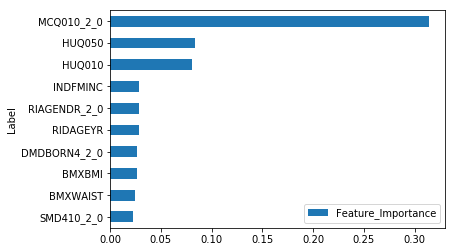

In [114]:
ax_r = rf_oo_r_s.plot.barh(y='Feature_Importance', x='Label')

### Upsampling: SMOTE

In [115]:
rf_output = pd.DataFrame(clf_s.feature_importances_)
rf_output['Label'] = X_sm.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [116]:
rf_oo_u = rf_output.nlargest(10, 'Feature_Importance')

In [117]:
rf_oo_u_s = rf_oo_u.sort_values(by=['Feature_Importance'])

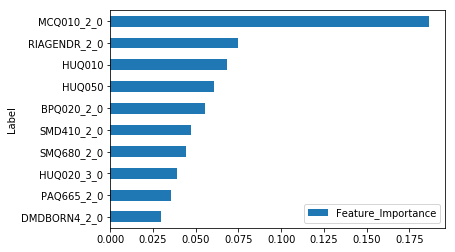

In [118]:
ax_u = rf_oo_u_s.plot.barh(y='Feature_Importance', x='Label')

### Downsampling: TomekLinks

In [119]:
rf_output = pd.DataFrame(clf_t.feature_importances_)
rf_output['Label'] = X_tl.columns
rf_output.columns = ['Feature_Importance', 'Label']

In [120]:
rf_oo_d = rf_output.nlargest(10, 'Feature_Importance')

In [121]:
rf_oo_d_s = rf_oo_d.sort_values(by=['Feature_Importance'])

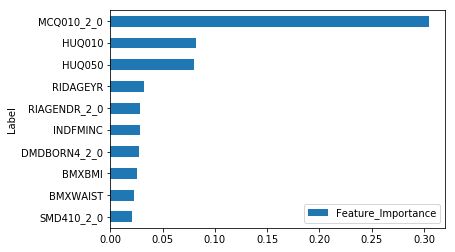

In [122]:
ax_d = rf_oo_d_s.plot.barh(y='Feature_Importance', x='Label')

# Model Evaluation

## Confusion Matrix & Classification Reports

### Regular Training

In [123]:
pred_r = clf_r.predict(X_test)

In [124]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_r, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5898,339,6237
1,235,130,365
All,6133,469,6602


In [125]:
r_output = '{} \n Accuracy: {}'
r = r_output.format(classification_report(y_true, pred_r, labels=[0,1]), accuracy_score(y_true, pred_r))
print(r)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6237
           1       0.28      0.36      0.31       365

   micro avg       0.91      0.91      0.91      6602
   macro avg       0.62      0.65      0.63      6602
weighted avg       0.92      0.91      0.92      6602
 
 Accuracy: 0.9130566495001514


### Upsampling: SMOTE

In [126]:
pred_s = clf_s.predict(X_test)

In [127]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_s, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,6180,57,6237
1,323,42,365
All,6503,99,6602


In [128]:
u_output = '{} \n Accuracy: {}'
u = u_output.format(classification_report(y_true, pred_s, labels=[0,1]), accuracy_score(y_true, pred_s))
print(u)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6237
           1       0.42      0.12      0.18       365

   micro avg       0.94      0.94      0.94      6602
   macro avg       0.69      0.55      0.58      6602
weighted avg       0.92      0.94      0.93      6602
 
 Accuracy: 0.9424416843380794


### Downsampling: TomekLinks

In [129]:
pred_t = clf_t.predict(X_test)

In [130]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_t, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5900,337,6237
1,233,132,365
All,6133,469,6602


In [131]:
d_output = '{} \n Accuracy: {}'
d = d_output.format(classification_report(y_true, pred_t, labels=[0,1]), accuracy_score(y_true, pred_t))
print(d)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6237
           1       0.28      0.36      0.32       365

   micro avg       0.91      0.91      0.91      6602
   macro avg       0.62      0.65      0.64      6602
weighted avg       0.92      0.91      0.92      6602
 
 Accuracy: 0.9136625265071191


## ROC AUC Score

### Regular Training

In [132]:
prob_y_2_r = clf_r.predict_proba(X_test)
prob_y_2_r = [p[1] for p in prob_y_2_r]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_r))

ROC AUC Score:  0.7973279215288347


### Upsampling:  SMOTE

In [133]:
prob_y_2_s = clf_s.predict_proba(X_test)
prob_y_2_s = [p[1] for p in prob_y_2_s]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_s))

ROC AUC Score:  0.795671874210687


### Downsampling: TomekLinks

In [134]:
prob_y_2_t = clf_t.predict_proba(X_test)
prob_y_2_t = [p[1] for p in prob_y_2_t]
print('ROC AUC Score: ', roc_auc_score(y_true, prob_y_2_t))

ROC AUC Score:  0.795170667316786


## Adjust Predictions Based on Probability Threshold

In [135]:
#Import Metrics
from sklearn.metrics import recall_score, precision_score

In [136]:
#Custom cutoff probability
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)

#Custom scoring function
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return f1_score(y, ypred)
    return f1_cutoff

### Regular Training

In [137]:
# scores_r = []
cutoffs_r = np.arange(0.4, 0.8, 0.05)

# for cutoff in cutoffs_r:
#     validated = cross_val_score(clf_r, X_train, y_train.values.ravel(), cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_r.append(validated)

In [138]:
# scores_r output
# [array([0.29988975, 0.32192933, 0.3065769 ]),
#  array([0.31818182, 0.35063958, 0.33905285]),
#  array([0.31784387, 0.33589251, 0.33097345]),
#  array([0.28018223, 0.29719854, 0.28540305]),
#  array([0.23545332, 0.21470588, 0.2397892 ]),
#  array([0.14935065, 0.11544992, 0.17418351]),
#  array([0.05090909, 0.02979516, 0.04339964]),
#  array([0., 0., 0.])]

In [139]:
scores_r_saved = [[0.29988975, 0.32192933, 0.3065769 ],
 [0.31818182, 0.35063958, 0.33905285],
 [0.31784387, 0.33589251, 0.33097345],
 [0.28018223, 0.29719854, 0.28540305],
 [0.23545332, 0.21470588, 0.2397892 ],
 [0.14935065, 0.11544992, 0.17418351],
 [0.05090909, 0.02979516, 0.04339964],
 [0., 0., 0.]]

In [140]:
#Melt and make scores into dataframe
scores_rdf = pd.DataFrame(scores_r_saved.copy())
#Rename columns
scores_rdf['Cutoff'] = pd.DataFrame(cutoffs_r).round(2)
#Create cutoff column values
scores_rdf = pd.melt(scores_rdf, id_vars='Cutoff')
scores_rdf.columns = ['Cutoff', 'CV', 'F Score'] 

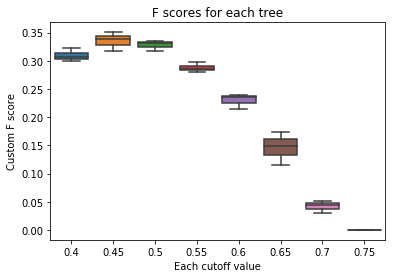

In [141]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_rdf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

Looks like the optimal cutoff is 0.45

In [142]:
cutoff_r = 0.45

### Upsampling: SMOTE

In [143]:
# scores_u = []
cutoffs_u = np.arange(0.45, 0.7, 0.05)

# for cutoff in cutoffs_u:
#     validated = cross_val_score(clf_s, X_sm, y_sm, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_u.append(validated)

In [144]:
# scores_u
# [array([0.90712176, 0.98959579, 0.98723455]),
#  array([0.90286319, 0.99345699, 0.99101689]),
#  array([0.89866436, 0.99578364, 0.99297339]),
#  array([0.89470172, 0.99583459, 0.99451642]),
#  array([0.89067524, 0.99576476, 0.99522745])]

In [145]:
scores_u_saved = [[0.90712176, 0.98959579, 0.98723455],
 [0.90286319, 0.99345699, 0.99101689],
 [0.89866436, 0.99578364, 0.99297339],
 [0.89470172, 0.99583459, 0.99451642],
 [0.89067524, 0.99576476, 0.99522745]]

In [146]:
#Melt and make scores into dataframe
scores_udf = pd.DataFrame(scores_u_saved.copy())
#Rename columns
scores_udf['Cutoff'] = pd.DataFrame(cutoffs_u).round(2)
#Create cutoff column values
scores_udf = pd.melt(scores_udf, id_vars='Cutoff')
scores_udf.columns = ['Cutoff', 'CV', 'F Score'] 

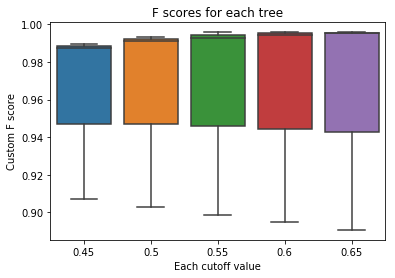

In [147]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_udf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [148]:
scores_udf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.45,0.961317
0.50,0.962446
0.55,0.962474
0.60,0.961684
0.65,0.960556


Looks like the optimal cutoff is 0.55

In [149]:
cutoff_u = 0.55

### Downsampling: TomekLinks

In [150]:
#scores_d = []
cutoffs_d = np.arange(0.4, 0.65, 0.05)

# for cutoff in cutoffs_d:
#     validated = cross_val_score(clf_t, X_tl, y_tl, cv = 3, scoring = custom_f1(cutoff), verbose = 1)
#     scores_d.append(validated)

In [151]:
# scores_d output
# [array([0.30166398, 0.32283029, 0.31655423]),
#  array([0.3225342 , 0.36350258, 0.35131397]),
#  array([0.31510658, 0.36074766, 0.32475599]),
#  array([0.28409091, 0.32235294, 0.28508772]),
#  array([0.25065963, 0.25316456, 0.25132275])]

In [152]:
scores_d_saved = [[0.30166398, 0.32283029, 0.31655423],
 [0.3225342 , 0.36350258, 0.35131397],
 [0.31510658, 0.36074766, 0.32475599],
 [0.28409091, 0.32235294, 0.28508772],
 [0.25065963, 0.25316456, 0.25132275]]

In [153]:
#Melt and make scores into dataframe
scores_ddf = pd.DataFrame(scores_d_saved.copy())
#Rename columns
scores_ddf['Cutoff'] = pd.DataFrame(cutoffs_d).round(2)
#Create cutoff column values
scores_ddf = pd.melt(scores_ddf, id_vars='Cutoff')
scores_ddf.columns = ['Cutoff', 'CV', 'F Score'] 

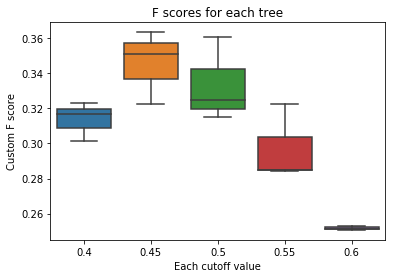

In [154]:
#Boxplot of 3-CV to determine F Score
sns.boxplot(x='Cutoff', y='F Score', data = scores_ddf)
plt.title('F scores for each tree')
plt.xlabel('Each cutoff value')
plt.ylabel('Custom F score')
plt.show()

In [155]:
scores_ddf.groupby('Cutoff').mean()

,F Score
Cutoff,
0.40,0.313683
0.45,0.345784
0.50,0.333537
0.55,0.297177
0.60,0.251716


Looks like the optimal is 0.45

In [156]:
cutoff_d = 0.45

## Model Evaluation based on Optimal Probability Cutoff

### Regular Training

In [157]:
pred_rc = np.where(pd.DataFrame(prob_y_2_r)>cutoff_r, 1, 0).flatten()

In [158]:
cutoff_r

0.45

In [159]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_rc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5693,544,6237
1,197,168,365
All,5890,712,6602


In [160]:
rc_output = '{} \n Accuracy: {}'
rc = rc_output.format(classification_report(y_true, pred_rc, labels=[0,1]), accuracy_score(y_true, pred_rc))
print(rc)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6237
           1       0.24      0.46      0.31       365

   micro avg       0.89      0.89      0.89      6602
   macro avg       0.60      0.69      0.63      6602
weighted avg       0.93      0.89      0.90      6602
 
 Accuracy: 0.8877612844592547


In [161]:
#Compare with default cutoff 0.5
print(r)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6237
           1       0.28      0.36      0.31       365

   micro avg       0.91      0.91      0.91      6602
   macro avg       0.62      0.65      0.63      6602
weighted avg       0.92      0.91      0.92      6602
 
 Accuracy: 0.9130566495001514


### Upsampling: SMOTE 

In [162]:
pred_uc = np.where(pd.DataFrame(prob_y_2_s)>cutoff_u, 1, 0).flatten()

In [163]:
cutoff_u

0.55

In [164]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_uc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,6206,31,6237
1,337,28,365
All,6543,59,6602


In [165]:
uc_output = '{} \n Accuracy: {}'
uc = uc_output.format(classification_report(y_true, pred_uc, labels=[0,1]), accuracy_score(y_true, pred_uc))
print(uc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6237
           1       0.47      0.08      0.13       365

   micro avg       0.94      0.94      0.94      6602
   macro avg       0.71      0.54      0.55      6602
weighted avg       0.92      0.94      0.92      6602
 
 Accuracy: 0.9442593153589821


In [166]:
#Compare with default cutoff 0.5
print(u)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6237
           1       0.42      0.12      0.18       365

   micro avg       0.94      0.94      0.94      6602
   macro avg       0.69      0.55      0.58      6602
weighted avg       0.92      0.94      0.93      6602
 
 Accuracy: 0.9424416843380794


### Downsampling: TomekLinks

In [167]:
pred_dc = np.where(pd.DataFrame(prob_y_2_t)>cutoff_d, 1, 0).flatten()

In [168]:
cutoff_d

0.45

In [169]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_dc, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5693,544,6237
1,199,166,365
All,5892,710,6602


In [170]:
dc_output = '{} \n Accuracy: {}'
dc = dc_output.format(classification_report(y_true, pred_dc, labels=[0,1]), accuracy_score(y_true, pred_dc))
print(dc)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6237
           1       0.23      0.45      0.31       365

   micro avg       0.89      0.89      0.89      6602
   macro avg       0.60      0.68      0.62      6602
weighted avg       0.93      0.89      0.90      6602
 
 Accuracy: 0.887458345955771


In [171]:
print(d)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6237
           1       0.28      0.36      0.32       365

   micro avg       0.91      0.91      0.91      6602
   macro avg       0.62      0.65      0.64      6602
weighted avg       0.92      0.91      0.92      6602
 
 Accuracy: 0.9136625265071191


## XGBOOST

In [172]:
# # A parameter grid for XGBoost
# params = {
#         'max_depth': [3, 4, 6],
#         'subsample': [1.0],
#         'colsample_bytree': [0.6, 1.0],
#         'scale_pos_weight': [8, 10, 12],
#         'learning_rate' : [0.1],
#         'n_estimators' : [200]
#         }

### Regular Training

#### GridSearch

In [173]:
#xg_class_r = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [174]:
#cv_xgr = GridSearchCV(estimator=xg_class_r, param_grid=params, scoring='f1', verbose=2, cv=3)

In [175]:
#cv_xgr.fit(X_train, y_train.values.ravel())

In [176]:
# cv_xgr.best_params_
# # {'colsample_bytree': 1.0,
# #  'learning_rate': 0.1,
# #  'max_depth': 3,
# #  'n_estimators': 200,
# #  'scale_pos_weight': 8,
# #  'subsample': 1.0}

In [177]:
# cv_xgr.best_score_
# #0.32453438483394226

#### Best Parameter

In [178]:
#cv_xgr.best_estimator_

In [179]:
xg_clf_r = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [180]:
xg_clf_r.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [181]:
pred_xgr = xg_clf_r.predict(X_test)

#### Evaluation

In [182]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgr, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5693,544,6237
1,201,164,365
All,5894,708,6602


In [183]:
rxg_output = '{} \n Accuracy: {}'
rxg = rxg_output.format(classification_report(y_true, pred_xgr, labels=[0,1]), accuracy_score(y_true, pred_xgr))
print(rxg)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6237
           1       0.23      0.45      0.31       365

   micro avg       0.89      0.89      0.89      6602
   macro avg       0.60      0.68      0.62      6602
weighted avg       0.93      0.89      0.90      6602
 
 Accuracy: 0.8871554074522872


##### Compare with Random Forest

In [184]:
print(r)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6237
           1       0.28      0.36      0.31       365

   micro avg       0.91      0.91      0.91      6602
   macro avg       0.62      0.65      0.63      6602
weighted avg       0.92      0.91      0.92      6602
 
 Accuracy: 0.9130566495001514


#### Feature Importance for XGBoost 

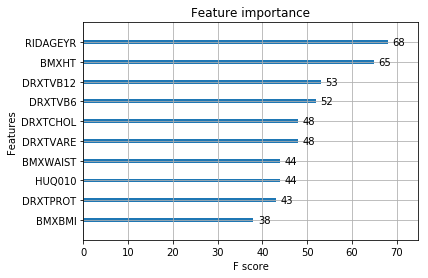

In [185]:
plot_importance(xg_clf_r, max_num_features = 10)

### Upsampling: SMOTE

#### GridSearch

In [186]:
#xg_class_u = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [187]:
#cv_xgu = GridSearchCV(estimator=xg_class_u, param_grid=params, scoring='f1', verbose=2, cv=3)

In [188]:
#cv_xgu.fit(X_sm, y_sm)

In [189]:
# cv_xgu.best_params_
# # {'colsample_bytree': 1.0,
# #  'learning_rate': 0.1,
# #  'max_depth': 6,
# #  'n_estimators': 200,
# #  'scale_pos_weight': 8,
# #  'subsample': 1.0}

In [190]:
# cv_xgu.best_score_
# #0.9377983128011458

#### Best Parameter

In [191]:
#cv_xgu.best_estimator_

In [192]:
xg_clf_u = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [193]:
xg_clf_u.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [194]:
pred_xgu = xg_clf_u.predict(X_test)

#### Evaluation

In [195]:
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgu, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5841,396,6237
1,248,117,365
All,6089,513,6602


In [196]:
uxg_output = '{} \n Accuracy: {}'
uxg = uxg_output.format(classification_report(y_true, pred_xgu, labels=[0,1]), accuracy_score(y_true, pred_xgu))
print(uxg)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6237
           1       0.23      0.32      0.27       365

   micro avg       0.90      0.90      0.90      6602
   macro avg       0.59      0.63      0.61      6602
weighted avg       0.92      0.90      0.91      6602
 
 Accuracy: 0.9024538018782188


##### Compare with Random Forest

In [197]:
print(u)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6237
           1       0.42      0.12      0.18       365

   micro avg       0.94      0.94      0.94      6602
   macro avg       0.69      0.55      0.58      6602
weighted avg       0.92      0.94      0.93      6602
 
 Accuracy: 0.9424416843380794


#### Feature Importance for XGBoost 

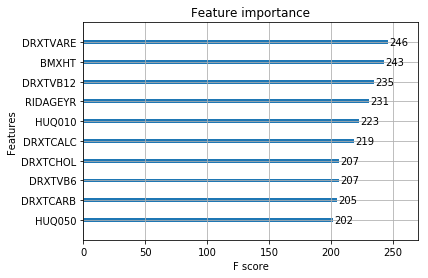

In [198]:
plot_importance(xg_clf_u, max_num_features = 10)

### Downsampling: TomekLinks

#### GridSearch

In [199]:
#xg_class_d = xgb.XGBClassifier(objective ='binary:logistic', random_state = 1, verbose = 1)

In [200]:
#cv_xgd = GridSearchCV(estimator=xg_class_d, param_grid=params, scoring='f1', verbose=2, cv=3)

In [201]:
#cv_xgd.fit(X_tl, y_tl)

In [202]:
# cv_xgd.best_params_
# # {'colsample_bytree': 0.6,
# #  'learning_rate': 0.1,
# #  'max_depth': 3,
# #  'n_estimators': 200,
# #  'scale_pos_weight': 8,
# #  'subsample': 1.0}

In [203]:
# cv_xgd.best_score_
# #0.33050227048894326

#### Best Parameter

In [204]:
#cv_xgd.best_estimator_

In [205]:
xg_clf_d = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

#### Predict

In [206]:
xg_clf_d.fit(X_tl, y_tl)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=8, seed=None,
       silent=True, subsample=1.0, verbose=1)

In [207]:
pred_xgd = xg_clf_d.predict(X_test)

#### Evaluation

In [208]:
#Creating a confusion matrix 
print('Confusion Matrix:')
pd.crosstab(y_true, pred_xgd, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix:


Predicted,0,1,All
True,,,
0,5667,570,6237
1,196,169,365
All,5863,739,6602


In [209]:
dxg_output = '{} \n Accuracy: {}'
dxg = dxg_output.format(classification_report(y_true, pred_xgd, labels=[0,1]), accuracy_score(y_true, pred_xgd))
print(dxg)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6237
           1       0.23      0.46      0.31       365

   micro avg       0.88      0.88      0.88      6602
   macro avg       0.60      0.69      0.62      6602
weighted avg       0.93      0.88      0.90      6602
 
 Accuracy: 0.8839745531657074


##### Compare with Random Forest

In [210]:
print(d)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6237
           1       0.28      0.36      0.32       365

   micro avg       0.91      0.91      0.91      6602
   macro avg       0.62      0.65      0.64      6602
weighted avg       0.92      0.91      0.92      6602
 
 Accuracy: 0.9136625265071191


#### Feature Importance for XGBoost 

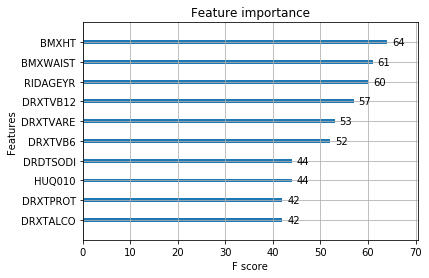

In [211]:
plot_importance(xg_clf_d, max_num_features = 10)

# Important Features: Risk Factors

### Feature Selection: Chi-Square

In [212]:
chi2_fi = featureScores.nlargest(10,'Score')
chi2_fi = chi2_fi.rename(columns={'Specs': 'Label', 'Score': 'Feature_Importance'})
chi2_fi

,Label,Feature_Importance
16,DRXTCAFF,23931.693612
14,DRDTSODI,23180.895418
26,DRXTPOTA,14436.896378
25,DRXTPHOS,13515.326334
23,DRXTKCAL,10237.893924
29,DRXTVARE,4054.328340
17,DRXTCALC,4026.189782
24,DRXTMAGN,3638.599722
19,DRXTCHOL,2612.282015
34,DRXTVC,1866.957255


### Random Forest

#### Regular:

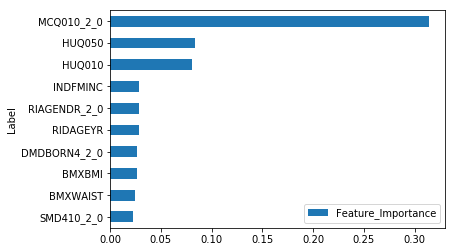

In [213]:
ax_r.figure

In [214]:
rfr_fi = rf_oo_r.copy()
rfr_fi

,Feature_Importance,Label
45,0.314235,MCQ010_2_0
42,0.083566,HUQ050
37,0.080652,HUQ010
44,0.028540,INDFMINC
49,0.028385,RIAGENDR_2_0
50,0.028006,RIDAGEYR
9,0.026591,DMDBORN4_2_0
1,0.026156,BMXBMI
3,0.024921,BMXWAIST
55,0.022704,SMD410_2_0


#### Upsample:

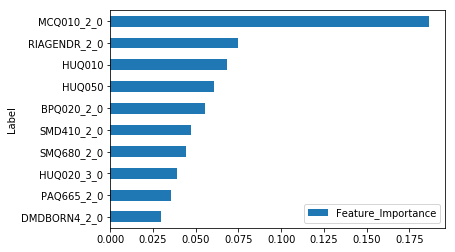

In [215]:
ax_u.figure

In [216]:
rfu_fi = rf_oo_u.copy()
rfu_fi

,Feature_Importance,Label
45,0.186452,MCQ010_2_0
49,0.074561,RIAGENDR_2_0
37,0.068475,HUQ010
42,0.060614,HUQ050
5,0.055379,BPQ020_2_0
55,0.047153,SMD410_2_0
56,0.044070,SMQ680_2_0
39,0.039284,HUQ020_3_0
48,0.035596,PAQ665_2_0
9,0.029629,DMDBORN4_2_0


#### Downsample:

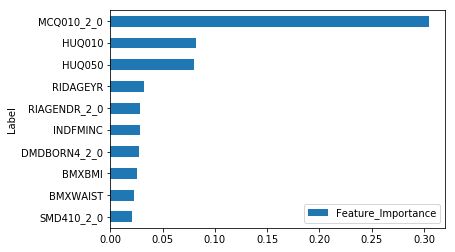

In [217]:
ax_d.figure

In [218]:
rfd_fi = rf_oo_d.copy()
rfd_fi

,Feature_Importance,Label
45,0.304711,MCQ010_2_0
37,0.082454,HUQ010
42,0.080090,HUQ050
50,0.031860,RIDAGEYR
49,0.028742,RIAGENDR_2_0
44,0.028032,INDFMINC
9,0.027719,DMDBORN4_2_0
1,0.025525,BMXBMI
3,0.023128,BMXWAIST
55,0.020474,SMD410_2_0


### XGBoost

#### Regular

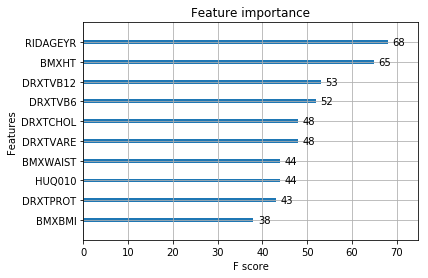

In [219]:
plot_importance(xg_clf_r, max_num_features = 10)

In [220]:
xgr_fs = xg_clf_r.get_booster().get_score(importance_type='weight')
xgr_fs = pd.DataFrame(xgr_fs.items(), columns = ['Label', 'Feature_Importance'])
xgr_fs = xgr_fs.nlargest(10, 'Feature_Importance')
xgr_fs

,Label,Feature_Importance
1,RIDAGEYR,68
12,BMXHT,65
22,DRXTVB12,53
23,DRXTVB6,52
21,DRXTVARE,48
24,DRXTCHOL,48
2,HUQ010,44
8,BMXWAIST,44
14,DRXTPROT,43
19,BMXBMI,38


In [221]:
xgr_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_r.feature_importances_, 'Label':X_train.columns})
xgr_fi = xgr_fi.nlargest(10,'Feature_Importance')
xgr_fi

,Feature_Importance,Label
45,0.240166,MCQ010_2_0
42,0.048494,HUQ050
56,0.043758,SMQ680_2_0
52,0.042666,RIDRETH1_3_0
37,0.041279,HUQ010
55,0.033691,SMD410_2_0
9,0.033684,DMDBORN4_2_0
49,0.032856,RIAGENDR_2_0
51,0.021778,RIDRETH1_2_0
44,0.020023,INDFMINC


#### Upsample:

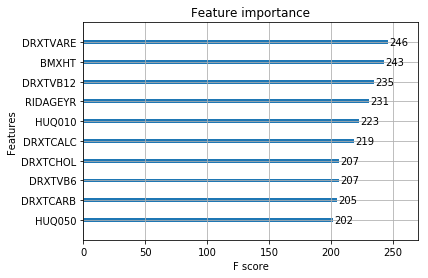

In [222]:
plot_importance(xg_clf_u, max_num_features = 10)

In [223]:
xgu_fs = xg_clf_u.get_booster().get_score(importance_type='weight')
xgu_fs = pd.DataFrame(xgu_fs.items(), columns = ['Label', 'Feature_Importance'])
xgu_fs = xgu_fs.nlargest(10, 'Feature_Importance')
xgu_fs

,Label,Feature_Importance
46,DRXTVARE,246
8,BMXHT,243
35,DRXTVB12,235
2,RIDAGEYR,231
1,HUQ010,223
14,DRXTCALC,219
48,DRXTVB6,207
51,DRXTCHOL,207
34,DRXTCARB,205
7,HUQ050,202


In [224]:
xgu_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_u.feature_importances_, 'Label':X_sm.columns})
xgu_fi = xgu_fi.nlargest(10,'Feature_Importance')
xgu_fi

,Feature_Importance,Label
45,0.146869,MCQ010_2_0
9,0.074461,DMDBORN4_2_0
49,0.073617,RIAGENDR_2_0
56,0.058386,SMQ680_2_0
37,0.057247,HUQ010
55,0.055821,SMD410_2_0
5,0.055273,BPQ020_2_0
39,0.053833,HUQ020_3_0
48,0.049539,PAQ665_2_0
52,0.042544,RIDRETH1_3_0


#### Downsample:

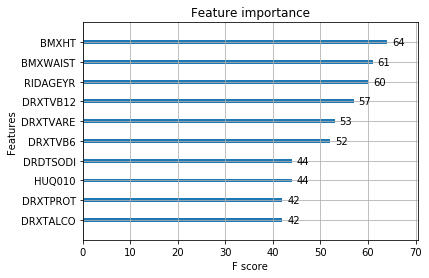

In [225]:
plot_importance(xg_clf_d, max_num_features = 10)

In [226]:
xgd_fs = xg_clf_d.get_booster().get_score(importance_type='weight')
xgd_fs = pd.DataFrame(xgd_fs.items(), columns = ['Label', 'Feature_Importance'])
xgd_fs = xgd_fs.nlargest(10, 'Feature_Importance')
xgd_fs

,Label,Feature_Importance
14,BMXHT,64
12,BMXWAIST,61
5,RIDAGEYR,60
33,DRXTVB12,57
21,DRXTVARE,53
37,DRXTVB6,52
1,HUQ010,44
24,DRDTSODI,44
17,DRXTALCO,42
25,DRXTPROT,42


In [227]:
xgd_fi = pd.DataFrame(data = {'Feature_Importance':xg_clf_d.feature_importances_, 'Label':X_tl.columns})
xgd_fi = xgd_fi.nlargest(10,'Feature_Importance')
xgd_fi

,Feature_Importance,Label
45,0.233574,MCQ010_2_0
42,0.054364,HUQ050
37,0.042084,HUQ010
52,0.041064,RIDRETH1_3_0
56,0.038195,SMQ680_2_0
9,0.037941,DMDBORN4_2_0
40,0.029960,HUQ030_2_0
55,0.029106,SMD410_2_0
49,0.027964,RIAGENDR_2_0
47,0.023930,PAQ650_2_0


# Rankings:

Weights for each ranking:

In [241]:
wts = {'chi2_fi': 0.025, 'rf_fi': .15, 'xg_fs': .10, 'xg_fi': .075}

In [242]:
#Suffix names to join on
jl = ['chi2_fi', 'rfr_fi', 'rfu_fi', 'rfd_fi', 'xgr_fs', 'xgu_fs', 'xgd_fs', 'xgr_fi', 'xgu_fi', 'xgd_fi']

In [243]:
#Outer join function
def outerjoin_df(dfs_list):
    n = 1
    df_join = dfs_list[0]
    for d in dfs_list[1:]:
        df_join = df_join.merge(d, how='outer', suffixes=('_'+jl[n-1], '_'+jl[n]), on=['Label'])
        n = n+1
    return df_join

In [244]:
#List of top 10 feature importances
join_list = [chi2_fi, rfr_fi, rfu_fi, rfd_fi, xgr_fs, xgu_fs, xgd_fs, xgr_fi, xgu_fi, xgd_fi]

In [245]:
#Joined list of top 10 feature importances
joined = outerjoin_df(join_list)

In [246]:
joined.head()

,Label,Feature_Importance_chi2_fi,Feature_Importance_rfr_fi,Feature_Importance_rfu_fi,Feature_Importance_rfd_fi,Feature_Importance_xgr_fs,Feature_Importance_xgu_fs,Feature_Importance_xgd_fs,Feature_Importance_xgr_fi,Feature_Importance_xgu_fi,Feature_Importance_xgd_fi
0,DRXTCAFF,23931.693612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRDTSODI,23180.895418,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN
2,DRXTPOTA,14436.896378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DRXTPHOS,13515.326334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DRXTKCAL,10237.893924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
#Get the percentage importance of top ten for each feature importance
pct_list = pd.DataFrame()
pct_list['Label'] = joined['Label']
for i, j in enumerate(jl):
    pct_list[j] = joined['Feature_Importance_'+jl[i]]/joined['Feature_Importance_'+jl[i]].sum()   

In [248]:
#Fill in NaNs with 0
pct_list = pct_list.fillna(0)
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi
0,DRXTCAFF,0.235778,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,DRDTSODI,0.228381,0.0,0.0,0.0,0.0,0.0,0.084778,0.0,0.0,0.0
2,DRXTPOTA,0.142234,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,DRXTPHOS,0.133155,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,DRXTKCAL,0.100865,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Column for weighted overall risk factor importance ranking

In [249]:
#Weighted overall ranking
pct_list['Importance'] = pct_list[jl[0]] * wts['chi2_fi'] + pct_list[jl[1]] * wts['rf_fi'] + pct_list[jl[2]] * wts['rf_fi'] + pct_list[jl[3]] * wts['rf_fi'] + pct_list[jl[4]] * wts['xg_fs'] + pct_list[jl[5]] * wts['xg_fs'] + pct_list[jl[6]] * wts['xg_fs'] + pct_list[jl[7]] * wts['xg_fi'] + pct_list[jl[8]] * wts['xg_fi'] + pct_list[jl[9]] * wts['xg_fi']

In [250]:
pct_list.head()

,Label,chi2_fi,rfr_fi,rfu_fi,rfd_fi,xgr_fs,xgu_fs,xgd_fs,xgr_fi,xgu_fi,xgd_fi,Importance
0,DRXTCAFF,0.235778,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.005894
1,DRDTSODI,0.228381,0.0,0.0,0.0,0.0,0.0,0.084778,0.0,0.0,0.0,0.014187
2,DRXTPOTA,0.142234,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003556
3,DRXTPHOS,0.133155,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003329
4,DRXTKCAL,0.100865,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002522


## Identified Top 10 Risk Factors:

In [251]:
Risk_Factors = pct_list[['Label','Importance']].copy()

In [252]:
Risk_Factors_10 = Risk_Factors.nlargest(10, 'Importance')
Risk_Factors_10

,Label,Importance
10,MCQ010_2_0,0.264795
12,HUQ010,0.098102
11,HUQ050,0.074395
15,RIDAGEYR,0.049145
14,RIAGENDR_2_0,0.046903
16,DMDBORN4_2_0,0.037298
24,BMXHT,0.036210
19,SMD410_2_0,0.035574
25,DRXTVB12,0.032115
5,DRXTVARE,0.031844


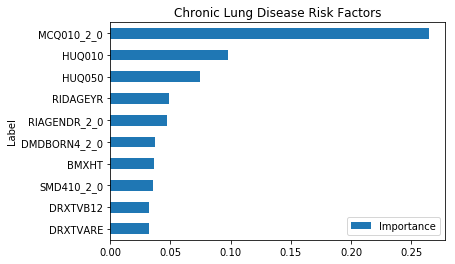

In [253]:
Risk_Factors_10 = Risk_Factors_10.sort_values(by=['Importance'])
Risk_Factors_Plot = Risk_Factors_10.plot.barh(y='Importance', x='Label', title='Chronic Lung Disease Risk Factors')